In [1]:
import pandas as pd;
import numpy as np;

import seaborn as sns;
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
input_df = pd.read_csv("train.csv")
input_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
input_df.shape

(1460, 81)

In [4]:

#Hence There are total 1460 rows and 81 coulumns in data set 
#checking type of each column and null values etc

input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Clean up and Preparation 

In [5]:
#Coulumns6,  72 ,73 , 74 hasvery less not null value hence delete the same 
del input_df['Alley']
del input_df['PoolQC']
del input_df['Fence']
del input_df['MiscFeature']

In [6]:
#Find duplicated rows 
input_df.shape
duplicate_rows = input_df.duplicated().sum()
duplicate_rows

0

In [7]:
#Find duplicated columns 
sorted(input_df.nunique())


[2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 12,
 12,
 15,
 15,
 16,
 20,
 21,
 24,
 25,
 61,
 76,
 97,
 110,
 112,
 120,
 144,
 202,
 274,
 327,
 417,
 441,
 637,
 663,
 721,
 753,
 780,
 861,
 1073,
 1460]

In [8]:
#Hence There are total 1460 rows and 81 coulumns in data set 
#checking type of each column and null values etc

input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
#Remove index coulumn as it is of no use 


del input_df['Id']

In [10]:
input_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
#Adding new coulum if remodelling done 

input_df["RemodellingDone"]  = input_df['YearBuilt'] != input_df['YearRemodAdd']

In [12]:
input_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodellingDone
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,False
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,False
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,True
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,True
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,False


In [13]:
#mONTH OF Sales migh not be big deciding creteria hence dropping it 

del input_df['MoSold']

del input_df['ExterCond']

del input_df['BsmtCond']

del input_df['BsmtExposure']

del input_df['BsmtFinType1']

del input_df['BsmtFinSF1']
del input_df['BsmtFinSF2']
del input_df['BsmtUnfSF']
del input_df['Heating']
del input_df['BsmtFullBath']
del input_df['HeatingQC']
del input_df['BsmtHalfBath']
del input_df['FireplaceQu']
del input_df['GarageType']
del input_df['GarageYrBlt']
del input_df['GarageFinish']
del input_df['GarageQual']
del input_df['GarageCond']
del input_df['PavedDrive']
del input_df['WoodDeckSF']
del input_df['3SsnPorch']
del input_df['ScreenPorch']



 




In [14]:

del input_df['LotFrontage']
del input_df['LotArea']
del input_df['LandContour']
del input_df['LandSlope']
del input_df['Condition1']

del input_df['Condition2']


del input_df['MSSubClass']
del input_df['RoofStyle']
del input_df['Exterior1st']

del input_df['Exterior2nd']



del input_df['Fireplaces']

input_df.head()



       

,MSZoning,Street,LotShape,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,RemodellingDone
0,RL,Pave,Reg,AllPub,Inside,CollgCr,1Fam,2Story,7,5,...,548,61,0,0,0,2008,WD,Normal,208500,False
1,RL,Pave,Reg,AllPub,FR2,Veenker,1Fam,1Story,6,8,...,460,0,0,0,0,2007,WD,Normal,181500,False
2,RL,Pave,IR1,AllPub,Inside,CollgCr,1Fam,2Story,7,5,...,608,42,0,0,0,2008,WD,Normal,223500,True
3,RL,Pave,IR1,AllPub,Corner,Crawfor,1Fam,2Story,7,5,...,642,35,272,0,0,2006,WD,Abnorml,140000,True
4,RL,Pave,IR1,AllPub,FR2,NoRidge,1Fam,2Story,8,5,...,836,84,0,0,0,2008,WD,Normal,250000,False


In [15]:
del input_df['BldgType']
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSZoning         1460 non-null   object 
 1   Street           1460 non-null   object 
 2   LotShape         1460 non-null   object 
 3   Utilities        1460 non-null   object 
 4   LotConfig        1460 non-null   object 
 5   Neighborhood     1460 non-null   object 
 6   HouseStyle       1460 non-null   object 
 7   OverallQual      1460 non-null   int64  
 8   OverallCond      1460 non-null   int64  
 9   YearBuilt        1460 non-null   int64  
 10  YearRemodAdd     1460 non-null   int64  
 11  RoofMatl         1460 non-null   object 
 12  MasVnrType       1452 non-null   object 
 13  MasVnrArea       1452 non-null   float64
 14  ExterQual        1460 non-null   object 
 15  Foundation       1460 non-null   object 
 16  BsmtQual         1423 non-null   object 
 17  BsmtFinType2  

In [16]:
del input_df['LotConfig']
del input_df['BsmtQual']
del input_df['CentralAir']
del input_df['1stFlrSF']
del input_df['2ndFlrSF']

del input_df['BsmtFinType2']

input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSZoning         1460 non-null   object 
 1   Street           1460 non-null   object 
 2   LotShape         1460 non-null   object 
 3   Utilities        1460 non-null   object 
 4   Neighborhood     1460 non-null   object 
 5   HouseStyle       1460 non-null   object 
 6   OverallQual      1460 non-null   int64  
 7   OverallCond      1460 non-null   int64  
 8   YearBuilt        1460 non-null   int64  
 9   YearRemodAdd     1460 non-null   int64  
 10  RoofMatl         1460 non-null   object 
 11  MasVnrType       1452 non-null   object 
 12  MasVnrArea       1452 non-null   float64
 13  ExterQual        1460 non-null   object 
 14  Foundation       1460 non-null   object 
 15  TotalBsmtSF      1460 non-null   int64  
 16  Electrical       1459 non-null   object 
 17  LowQualFinSF  

In [17]:
del input_df['MasVnrArea']
del input_df['MasVnrType']

del input_df['GarageArea']

del input_df['Foundation']

del input_df['LowQualFinSF']

del input_df['GrLivArea']
del input_df['KitchenQual']  

del input_df['TotRmsAbvGrd']

del input_df['OpenPorchSF']

del input_df['EnclosedPorch']

input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSZoning         1460 non-null   object
 1   Street           1460 non-null   object
 2   LotShape         1460 non-null   object
 3   Utilities        1460 non-null   object
 4   Neighborhood     1460 non-null   object
 5   HouseStyle       1460 non-null   object
 6   OverallQual      1460 non-null   int64 
 7   OverallCond      1460 non-null   int64 
 8   YearBuilt        1460 non-null   int64 
 9   YearRemodAdd     1460 non-null   int64 
 10  RoofMatl         1460 non-null   object
 11  ExterQual        1460 non-null   object
 12  TotalBsmtSF      1460 non-null   int64 
 13  Electrical       1459 non-null   object
 14  FullBath         1460 non-null   int64 
 15  HalfBath         1460 non-null   int64 
 16  BedroomAbvGr     1460 non-null   int64 
 17  KitchenAbvGr     1460 non-null   

In [18]:
input_df.corr()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,PoolArea,MiscVal,YrSold,SalePrice,RemodellingDone
OverallQual,1.000000,-0.091932,0.572323,0.550684,0.537808,0.550600,0.273458,0.101676,-0.183882,0.600671,0.065166,-0.031406,-0.027347,0.790982,-0.080468
OverallCond,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.194149,-0.060769,0.012980,-0.087001,-0.185758,-0.001985,0.068777,0.043950,-0.077856,0.308884
YearBuilt,0.572323,-0.375983,1.000000,0.592855,0.391452,0.468271,0.242656,-0.070651,-0.174800,0.537850,0.004950,-0.034383,-0.013618,0.522897,-0.414931
YearRemodAdd,0.550684,0.073741,0.592855,1.000000,0.291066,0.439046,0.183331,-0.040581,-0.149598,0.420622,0.005829,-0.010286,0.035743,0.507101,0.083287
TotalBsmtSF,0.537808,-0.171098,0.391452,0.291066,1.000000,0.323722,-0.048804,0.050450,-0.068901,0.434585,0.126053,-0.018479,-0.014969,0.613581,-0.083690
FullBath,0.550600,-0.194149,0.468271,0.439046,0.323722,1.000000,0.136381,0.363252,0.133115,0.469672,0.049604,-0.014290,-0.019669,0.560664,-0.077909
HalfBath,0.273458,-0.060769,0.242656,0.183331,-0.048804,0.136381,1.000000,0.226651,-0.068263,0.219178,0.022381,0.001290,-0.010269,0.284108,-0.094064
BedroomAbvGr,0.101676,0.012980,-0.070651,-0.040581,0.050450,0.363252,0.226651,1.000000,0.198597,0.086106,0.070703,0.007767,-0.036014,0.168213,0.006657
KitchenAbvGr,-0.183882,-0.087001,-0.174800,-0.149598,-0.068901,0.133115,-0.068263,0.198597,1.000000,-0.050634,-0.014525,0.062341,0.031687,-0.135907,0.003633
GarageCars,0.600671,-0.185758,0.537850,0.420622,0.434585,0.469672,0.219178,0.086106,-0.050634,1.000000,0.020934,-0.043080,-0.039117,0.640409,-0.139360


In [19]:
del input_df['PoolArea']
del input_df['MiscVal']

del input_df['YrSold']

del input_df['KitchenAbvGr']



input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSZoning         1460 non-null   object
 1   Street           1460 non-null   object
 2   LotShape         1460 non-null   object
 3   Utilities        1460 non-null   object
 4   Neighborhood     1460 non-null   object
 5   HouseStyle       1460 non-null   object
 6   OverallQual      1460 non-null   int64 
 7   OverallCond      1460 non-null   int64 
 8   YearBuilt        1460 non-null   int64 
 9   YearRemodAdd     1460 non-null   int64 
 10  RoofMatl         1460 non-null   object
 11  ExterQual        1460 non-null   object
 12  TotalBsmtSF      1460 non-null   int64 
 13  Electrical       1459 non-null   object
 14  FullBath         1460 non-null   int64 
 15  HalfBath         1460 non-null   int64 
 16  BedroomAbvGr     1460 non-null   int64 
 17  Functional       1460 non-null   

# Performing EDA on Data 

<Axes: >

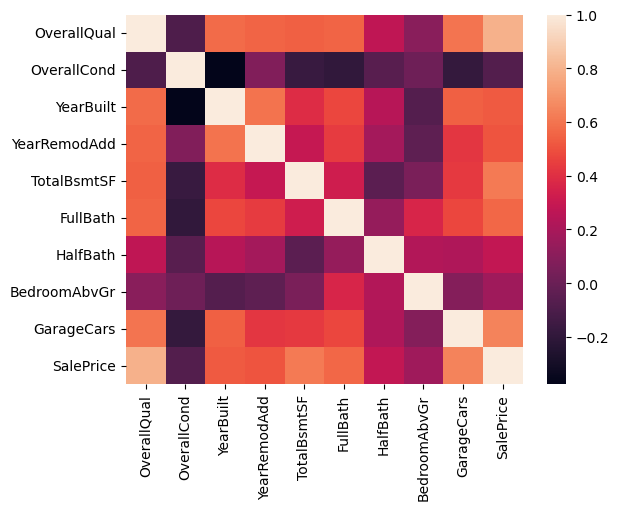

In [20]:
corr = input_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [21]:
input_df.corr()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,GarageCars,SalePrice,RemodellingDone
OverallQual,1.000000,-0.091932,0.572323,0.550684,0.537808,0.550600,0.273458,0.101676,0.600671,0.790982,-0.080468
OverallCond,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.194149,-0.060769,0.012980,-0.185758,-0.077856,0.308884
YearBuilt,0.572323,-0.375983,1.000000,0.592855,0.391452,0.468271,0.242656,-0.070651,0.537850,0.522897,-0.414931
YearRemodAdd,0.550684,0.073741,0.592855,1.000000,0.291066,0.439046,0.183331,-0.040581,0.420622,0.507101,0.083287
TotalBsmtSF,0.537808,-0.171098,0.391452,0.291066,1.000000,0.323722,-0.048804,0.050450,0.434585,0.613581,-0.083690
FullBath,0.550600,-0.194149,0.468271,0.439046,0.323722,1.000000,0.136381,0.363252,0.469672,0.560664,-0.077909
HalfBath,0.273458,-0.060769,0.242656,0.183331,-0.048804,0.136381,1.000000,0.226651,0.219178,0.284108,-0.094064
BedroomAbvGr,0.101676,0.012980,-0.070651,-0.040581,0.050450,0.363252,0.226651,1.000000,0.086106,0.168213,0.006657
GarageCars,0.600671,-0.185758,0.537850,0.420622,0.434585,0.469672,0.219178,0.086106,1.000000,0.640409,-0.139360
SalePrice,0.790982,-0.077856,0.522897,0.507101,0.613581,0.560664,0.284108,0.168213,0.640409,1.000000,-0.021933


# Univariate Analysis 

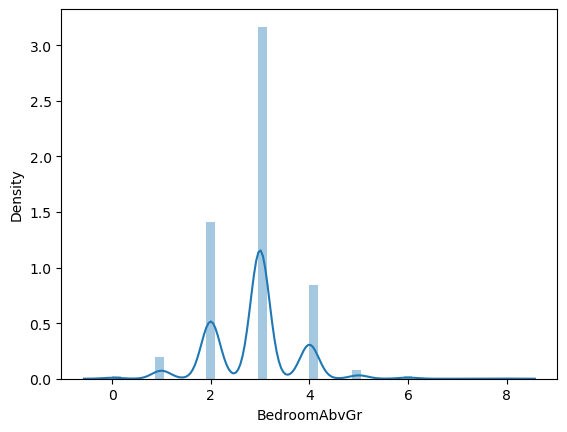

In [22]:
#Univarate analysis 
sns.distplot(input_df['BedroomAbvGr'])

plt.show()

#Hence 3 BHK rooms are sold more than 2 BHK rooms 

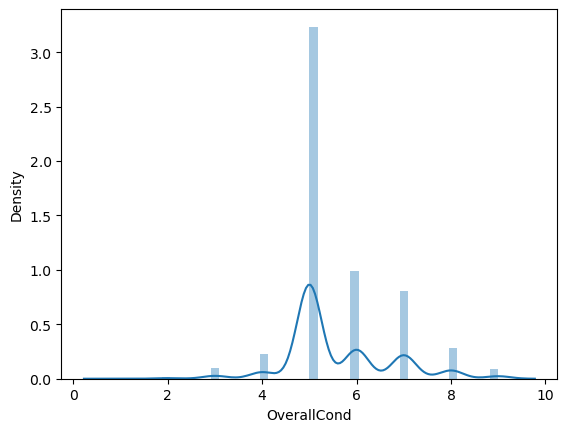

In [23]:
sns.distplot(input_df['OverallCond'])

plt.show()

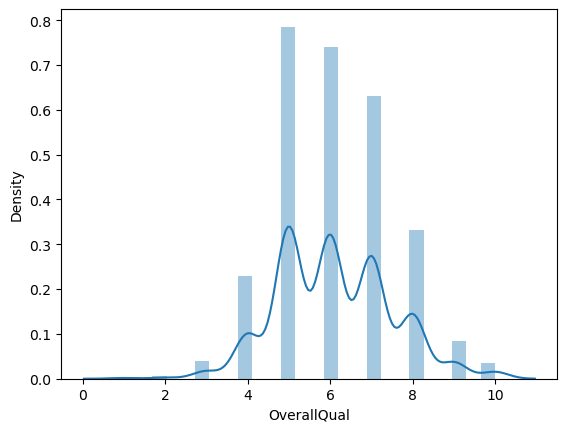

In [24]:
sns.distplot(input_df['OverallQual'])
plt.show()

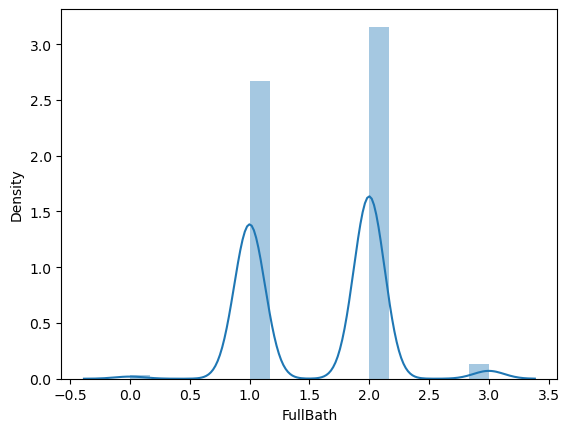

In [25]:
#From above charts its eveident that mid condition plot 5 are sold most and also 
# mid range of quality plots sold most 

sns.distplot(input_df['FullBath'])
plt.show()

#Hence Bathroom two of flats sold most 

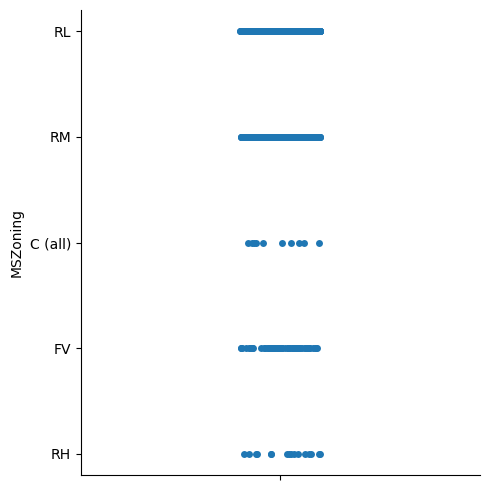

In [26]:
sns.catplot(data=input_df['MSZoning'])

#Residendial and floating villages are sold most 

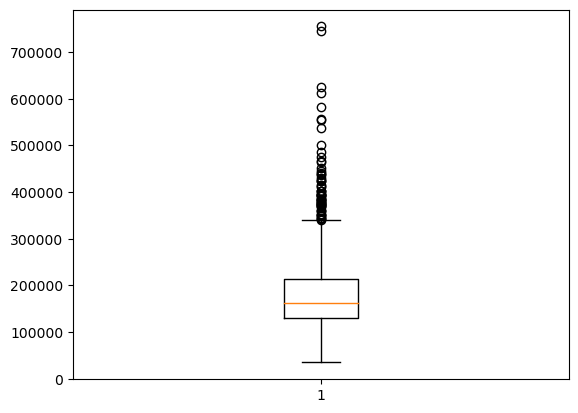

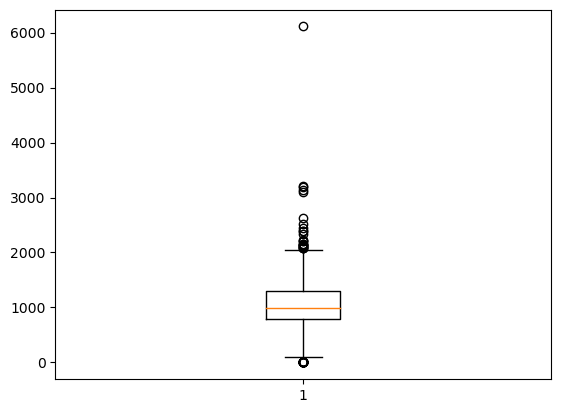

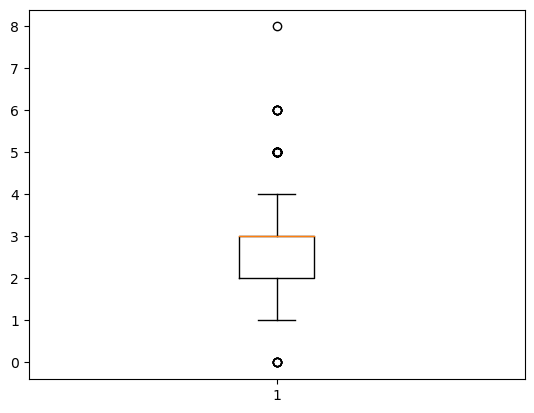

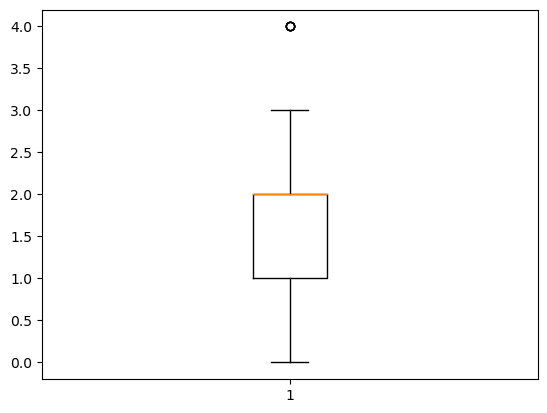

In [27]:
plt.boxplot(input_df['SalePrice'])
plt.show()
plt.boxplot(input_df['TotalBsmtSF'])
plt.show()
plt.boxplot(input_df['BedroomAbvGr'])
plt.show()
plt.boxplot(input_df['GarageCars'])
plt.show()

#Above 35 lakhs less plots are sold

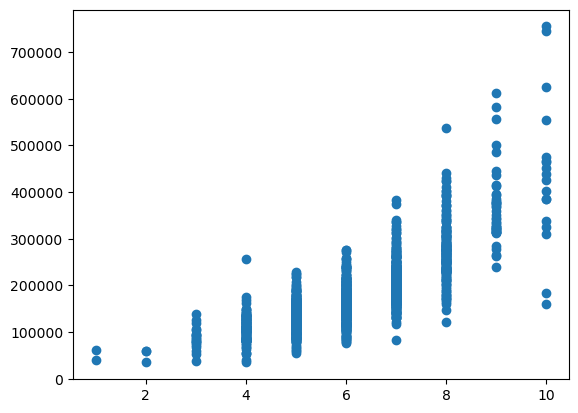

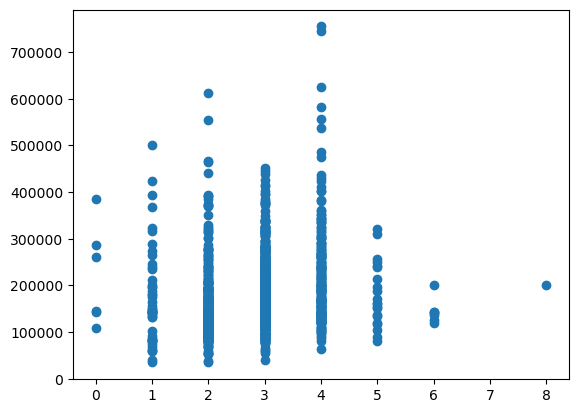

In [28]:
#Draw scatter  charts 

plt.scatter(input_df['OverallQual'], input_df['SalePrice'])

plt.show()

plt.scatter(input_df['BedroomAbvGr'], input_df['SalePrice'])
plt.show()

#Hence high  quality plot will be sold at better price
#High demand is for 2 3 and 4 BHK

# Bivaraiate Analysis

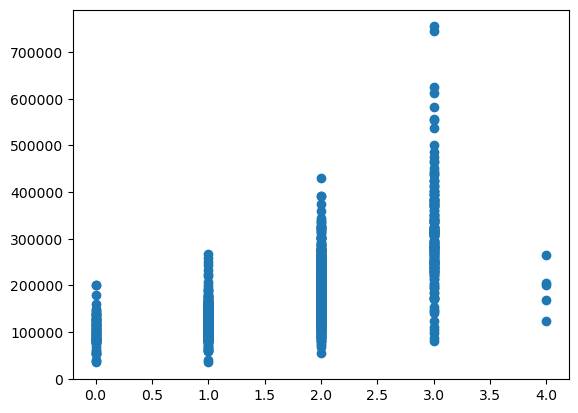

In [29]:
plt.scatter(input_df['GarageCars'],input_df['SalePrice'])
plt.show()

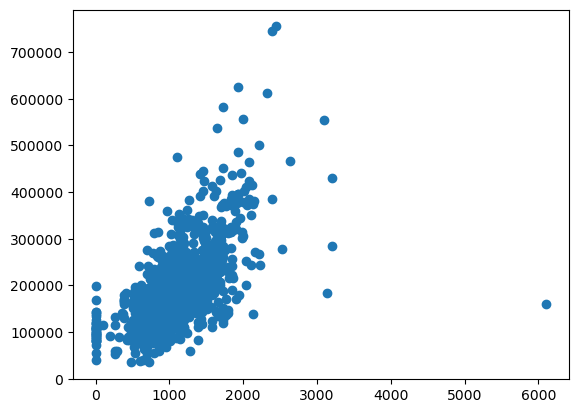

In [30]:
plt.scatter(input_df['TotalBsmtSF'],input_df['SalePrice'])
plt.show()
#hence price increases as basement area increaes 


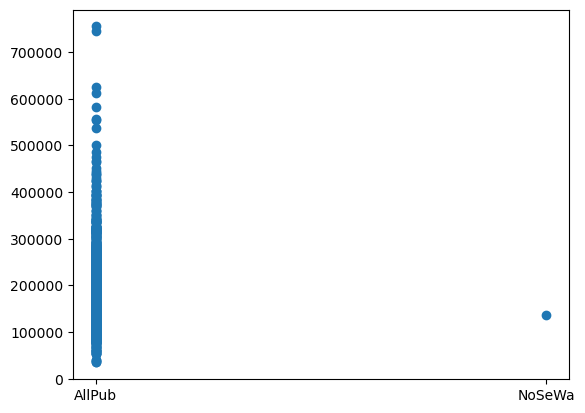

In [31]:
plt.scatter(input_df['Utilities'],input_df['SalePrice'])
plt.show()

#mist of the houses are of all utilities

In [32]:
#drop utilities column
del input_df['Utilities']


# Data Preparation 

In [33]:
#Data Preparation
#Changing catagorical variables into integer 

input_df_categorical = input_df.select_dtypes(include=['object'])
input_df_categorical

,MSZoning,Street,LotShape,Neighborhood,HouseStyle,RoofMatl,ExterQual,Electrical,Functional,SaleType,SaleCondition
0,RL,Pave,Reg,CollgCr,2Story,CompShg,Gd,SBrkr,Typ,WD,Normal
1,RL,Pave,Reg,Veenker,1Story,CompShg,TA,SBrkr,Typ,WD,Normal
2,RL,Pave,IR1,CollgCr,2Story,CompShg,Gd,SBrkr,Typ,WD,Normal
3,RL,Pave,IR1,Crawfor,2Story,CompShg,TA,SBrkr,Typ,WD,Abnorml
4,RL,Pave,IR1,NoRidge,2Story,CompShg,Gd,SBrkr,Typ,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Gilbert,2Story,CompShg,TA,SBrkr,Typ,WD,Normal
1456,RL,Pave,Reg,NWAmes,1Story,CompShg,TA,SBrkr,Min1,WD,Normal
1457,RL,Pave,Reg,Crawfor,2Story,CompShg,Ex,SBrkr,Typ,WD,Normal
1458,RL,Pave,Reg,NAmes,1Story,CompShg,TA,FuseA,Typ,WD,Normal


In [34]:
# Convert into dummies
input_df_dummies = pd.get_dummies(input_df_categorical, drop_first=True)
input_df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
# Drop categorical variable columns
input_df = input_df.drop(list(input_df_categorical.columns), axis=1)

In [36]:
# Concatenate dummy variables with the original dataframe
input_df = pd.concat([input_df, input_df_dummies], axis=1)
input_df.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,GarageCars,SalePrice,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,5,2003,2003,856,2,1,3,2,208500,...,0,0,0,0,1,0,0,0,1,0
1,6,8,1976,1976,1262,2,0,3,2,181500,...,0,0,0,0,1,0,0,0,1,0
2,7,5,2001,2002,920,2,1,3,2,223500,...,0,0,0,0,1,0,0,0,1,0
3,7,5,1915,1970,756,1,0,3,3,140000,...,0,0,0,0,1,0,0,0,0,0
4,8,5,2000,2000,1145,2,1,4,3,250000,...,0,0,0,0,1,0,0,0,1,0


In [37]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   OverallQual            1460 non-null   int64
 1   OverallCond            1460 non-null   int64
 2   YearBuilt              1460 non-null   int64
 3   YearRemodAdd           1460 non-null   int64
 4   TotalBsmtSF            1460 non-null   int64
 5   FullBath               1460 non-null   int64
 6   HalfBath               1460 non-null   int64
 7   BedroomAbvGr           1460 non-null   int64
 8   GarageCars             1460 non-null   int64
 9   SalePrice              1460 non-null   int64
 10  RemodellingDone        1460 non-null   bool 
 11  MSZoning_FV            1460 non-null   uint8
 12  MSZoning_RH            1460 non-null   uint8
 13  MSZoning_RL            1460 non-null   uint8
 14  MSZoning_RM            1460 non-null   uint8
 15  Street_Pave            1460 non-null  

In [38]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(input_df, train_size=0.7, test_size=0.3, random_state=100)



df_train


df_test

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,GarageCars,SalePrice,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,4,6,1971,1971,864,1,0,3,2,120500,...,0,0,0,0,1,0,0,0,1,0
57,7,5,2004,2004,860,2,1,3,2,196500,...,0,0,0,0,1,0,0,0,1,0
780,7,5,1995,1996,1237,2,0,3,2,176000,...,0,0,0,0,1,0,0,0,1,0
382,7,5,2006,2006,939,2,1,3,2,213500,...,0,0,0,0,1,0,0,0,1,0
1170,6,6,1977,1977,1096,1,0,3,1,171000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,6,1959,1959,1041,1,0,3,1,124500,...,0,0,0,0,1,0,0,0,1,0
555,5,6,1922,1950,993,1,0,2,1,113000,...,0,0,0,0,1,0,0,0,1,0
399,7,5,2006,2007,1092,2,0,2,2,241000,...,0,0,0,0,1,0,0,0,1,0
545,7,5,1988,1988,1204,2,1,4,3,229000,...,0,0,0,0,1,0,0,0,1,0


In [39]:
#Perform scaling 

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

var = [ 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       
 'FullBath','HalfBath','BedroomAbvGr', 'GarageCars']

df_train[var] = scaler.fit_transform(df_train[var])

df_train

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,GarageCars,SalePrice,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.444444,0.625,0.384058,0.000000,0.141408,0.333333,0.0,0.250,0.00,98000,...,0,0,0,0,1,0,0,0,1,0
318,0.666667,0.500,0.876812,0.716667,0.220458,0.666667,0.5,0.500,0.75,260000,...,0,0,0,0,1,0,0,0,1,0
239,0.555556,0.375,0.528986,0.000000,0.120295,0.333333,0.5,0.375,0.25,113000,...,0,0,0,0,1,0,0,0,1,0
986,0.555556,0.875,0.275362,0.883333,0.079378,0.333333,0.0,0.250,0.25,117000,...,0,0,0,0,1,0,0,0,1,0
1416,0.333333,0.625,0.094203,0.000000,0.127169,0.666667,0.0,0.500,0.50,122500,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.444444,0.500,0.391304,0.000000,0.164975,0.666667,0.0,0.500,0.00,102000,...,0,0,0,0,1,0,0,0,1,0
802,0.666667,0.500,0.963768,0.916667,0.119149,0.666667,0.5,0.375,0.50,189000,...,0,0,0,0,1,0,0,0,1,0
53,0.888889,0.500,0.789855,0.616667,0.301473,0.000000,0.5,0.000,0.75,385000,...,0,0,0,0,1,0,0,0,1,0
350,0.888889,0.500,0.978261,0.950000,0.305892,0.666667,0.0,0.250,0.50,318061,...,0,0,1,0,0,0,0,0,0,1


In [40]:
#Dividing into X and Y sets for the model building
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('SalePrice')


In [41]:
X_train = df_train
X_train = X_train.drop(['RemodellingDone'], axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1021 non-null   float64
 1   OverallCond            1021 non-null   float64
 2   YearBuilt              1021 non-null   float64
 3   YearRemodAdd           1021 non-null   float64
 4   TotalBsmtSF            1021 non-null   float64
 5   FullBath               1021 non-null   float64
 6   HalfBath               1021 non-null   float64
 7   BedroomAbvGr           1021 non-null   float64
 8   GarageCars             1021 non-null   float64
 9   MSZoning_FV            1021 non-null   uint8  
 10  MSZoning_RH            1021 non-null   uint8  
 11  MSZoning_RL            1021 non-null   uint8  
 12  MSZoning_RM            1021 non-null   uint8  
 13  Street_Pave            1021 non-null   uint8  
 14  LotShape_IR2           1021 non-null   uint8  
 15  LotS

In [42]:
np.asarray(df_train)

array([[0.4444444444444445, 0.625, 0.38405797101449224, ..., 0, 1, 0],
       [0.6666666666666665, 0.5, 0.8768115942028984, ..., 0, 1, 0],
       [0.5555555555555556, 0.375, 0.5289855072463769, ..., 0, 1, 0],
       ...,
       [0.8888888888888888, 0.5, 0.7898550724637676, ..., 0, 1, 0],
       [0.8888888888888888, 0.5, 0.9782608695652169, ..., 0, 0, 1],
       [0.4444444444444445, 0.625, 0.27536231884058004, ..., 0, 1, 0]],
      dtype=object)

# Start with Lienar Regression 

In [43]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                   -542439.059195
OverallQual              132316.956883
OverallCond               45205.541867
YearBuilt                  7296.190957
YearRemodAdd              11635.927964
                             ...      
SaleCondition_AdjLand     18592.775361
SaleCondition_Alloca      21098.061269
SaleCondition_Family      -1669.805580
SaleCondition_Normal       2808.552621
SaleCondition_Partial     14191.709896
Length: 82, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.32316957e+05  4.83262980e+04 -2.32248527e+03  2.09926769e+04
  3.24842378e+05  4.37709906e+04  2.43510762e+04  1.11179712e+03
  3.93563430e+04 -1.31695202e+04  2.20879460e+04  2.03473461e+04
  6.65142738e+03  2.68721835e+04  7.33721767e+03  3.32351306e+04
 -2.92385460e+03 -5.56735072e+03 -4.31128900e+03  1.73694146e+04
  3.44555772e+04  7.87978689e+03  6.09203618e+04  2.24277270e+03
 -3.39737695e+03 -1.10239199e+03  1.86751931e+04  2.89040965e+03
  7.94636235e+03 -1.82433030e+04  7.61803053e+03  7.94666511e+04
  3.51297903e+04 -1.09194350e+03  1.00633235e+04  9.90915141e+03
  5.97293617e+03  3.23858047e+04  3.32688162e+04  2.17214289e+04
  3.32935187e+04 -2.89639789e+04 -1.39111825e+04  1.71020214e+04
 -1.39816191e+04  2.54133280e+03 -1.66709440e+04 -5.64066862e+03
  3.96844961e+05  4.62346383e+05  4.17398152e+05  3.85139667e+05
  4.26186980e+05  4.35523404e+05  5.02308566e+05 -3.55156867e+04
 -4.30184849e+04 -4.75688555e+04 -5.11511080e+03 -1.83115297e+04
 -1.54080961e+14 -1.20605

In [46]:
#Print summary of the model 

lr.summary()

#Value of R square is .837 which is pretty good but it has too many variables
#this could be reason of overfitting 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     61.01
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          7.26e-316
Time:                        16:34:03   Log-Likelihood:                -12038.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     941   BIC:                         2.463e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.424e+05   5.41e+04    -10.021      0.000   -6.49e+05   -4.36e+05
OverallQual            1.323e+05   1.33e+04      9.950      0.000    1.06e+05    1.58e+05
OverallCond            4.521e+04   1.04e+04      4.360      0.000    2.49e+04    6.56e+04
YearBuilt              7296.1910   1.27e+04      0.575      0.566   -1.76e+04    3.22e+04
YearRemodAdd           1.164e+04   4934.388      2.358      0.019    1952.249    2.13e+04
TotalBsmtSF            3.255e+05   2.36e+04     13.770      0.000    2.79e+05    3.72e+05
FullBath               5.103e+04   8957.546      5.697      0.000    3.34e+04    6.86e+04
HalfBath               2.629e+04   6261.651      4.198      0.000     1.4e+04    3.86e+04
BedroomAbvGr              0.3677   1.41e+04   2.61e-05      1.000   -2.76e+04    2.76e+04
GarageCars             5.584e+04   7920.236      7.051      0.000    4.03e+04    7.14e+04
MSZoning_FV             678.5151   1.88e+04      0.036      0.971   -3.63e+04    3.76e+04
MSZoning_RH            3.003e+04   1.87e+04      1.606      0.109   -6669.532    6.67e+04
MSZoning_RL            2.748e+04   1.58e+04      1.736      0.083   -3580.999    5.85e+04
MSZoning_RM            1.379e+04    1.5e+04      0.918      0.359   -1.57e+04    4.33e+04
Street_Pave            1.243e+04   1.87e+04      0.665      0.506   -2.42e+04    4.91e+04
LotShape_IR2           1213.7557   6543.893      0.185      0.853   -1.16e+04    1.41e+04
LotShape_IR3           2.588e+04   1.26e+04      2.062      0.040    1246.581    5.05e+04
LotShape_Reg          -3416.7325   2582.686     -1.323      0.186   -8485.223    1651.758
Neighborhood_Blueste   1.376e+04   3.62e+04      0.380      0.704   -5.72e+04    8.47e+04
Neighborhood_BrDale     918.7292   1.58e+04      0.058      0.954   -3.01e+04    3.19e+04
Neighborhood_BrkSide   2.739e+04   1.34e+04      2.037      0.042    1001.917    5.38e+04
Neighborhood_ClearCr   4.463e+04   1.35e+04      3.310      0.001    1.82e+04    7.11e+04
Neighborhood_CollgCr   2.161e+04   1.05e+04      2.058      0.040    1007.557    4.22e+04
Neighborhood_Crawfor    5.45e+04   1.26e+04      4.320      0.000    2.97e+04    7.93e+04
Neighborhood_Edwards   1.917e+04   1.17e+04      1.639      0.102   -3789.748    4.21e+04
Neighborhood_Gilbert   1.246e+04   1.14e+04      1.091      0.275   -9941.365    3.49e+04
Neighborhood_IDOTRR    2.661e+04    1.5e+04      1.770      0.077   -2897.670    5.61e+04
Neighborhood_MeadowV   2.671e+04    1.7e+04      1.570      0.117   -6673.655    6.01e+04
Neighborhood_Mitchel   1.859e+04   1.18e+04      1.579      0.115   -4518.807    4.17e+04
Neighborhood_NAmes     2.129e+04   1.12e+04      1.897      0.058    -731.951    4.33e+04
Neighborhood_NPkVill  -1.391e+04   1.72e+04     -0.806      0.420   -4.78e+04    1.99e+04
Neighborhood_NWAmes    

In [47]:
#further use RFE Or VIF to delete insignifiacnt variables 

# Import RFE
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe1 = RFE(lm,n_features_to_select= 60)


rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True False  True  True  True  True False  True False  True  True
  True  True False  True False False  True  True  True  True  True False
 False  True  True False  True  True False  True  True False False False
  True  True  True  True  True  True  True False  True False  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False False  True]
[ 1  1 19  1  1  1  1  9  1 16  1  1  1  1 17  1  6 20  1  1  1  1  1  4
 11  1  1  5  1  1 12  1  1 22 10  3  1  1  1  1  1  1  1 14  1 13  1  7
  1  1  1  1  1  1  1  1  1  1 18  1  1  2  1  1  1  8  1  1  1  1  1  1
  1  1  1  1  1  1 15 21  1]


In [48]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     83.74
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:34:03   Log-Likelihood:                -12045.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     962   BIC:                         2.450e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.112e+

In [49]:
#lets try further reduction of features
lm = LinearRegression()
rfe2 = RFE(lm,n_features_to_select=23)

rfe2.fit(X_train_rfe1, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  


[False  True  True False  True  True  True  True False False False False
 False  True False False False  True False False False  True  True False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True False False  True False False
  True False False  True False False False False False False False False
 False]
[37  1  1 25  1  1  1  1 19 21 22 23  6  1 31  2 36  1 33 32 39  1  1  3
 38 20  4 11 12 14 24  5 29  1  1  1  1  1  1  1  1  1  1  7 30  1 34 26
  1 27 15  1  9 28 35 16 10 17  8 18 13]


In [50]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col2 = X_train_rfe1.columns[rfe2.support_]

# Subsetting training data for 15 selected columns
X_train_rfe2 = X_train_rfe1[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     184.8
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:34:03   Log-Likelihood:                -12116.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     997   BIC:                         2.440e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.386e+05 

In [51]:
#we have git model with 23 no of features and corresponding r  square value of 81 % 
#with RFE now its time to check multiconlineralty among features if in case there is any , so that 
# we can reduce no of fetures further 

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

a=X_train_rfe2.drop('const',axis=1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,RoofMatl_CompShg,115.23
0,OverallQual,41.89
19,ExterQual_TA,27.48
1,OverallCond,20.70
3,FullBath,13.93
18,ExterQual_Gd,12.07
5,GarageCars,11.32
2,TotalBsmtSF,9.79
4,HalfBath,1.87
14,RoofMatl_Tar&Grv,1.84


In [52]:
#Since RoofMatl_CompShg has maximum VIF lets drop it first and check model
# Let's drop the RoofMatl_CompShg column
X_train_rfe2.drop("RoofMatl_CompShg",axis=1,inplace=True)
X_train_rfe2



,const,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,GarageCars,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_NPkVill,...,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Functional_Maj2,Functional_Sev,SaleType_Con
210,1.0,0.444444,0.625,0.141408,0.333333,0.0,0.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
318,1.0,0.666667,0.500,0.220458,0.666667,0.5,0.75,0,0,0,...,0,0,0,0,0,1,0,0,0,0
239,1.0,0.555556,0.375,0.120295,0.333333,0.5,0.25,0,0,0,...,0,0,0,0,0,0,1,0,0,0
986,1.0,0.555556,0.875,0.079378,0.333333,0.0,0.25,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1416,1.0,0.333333,0.625,0.127169,0.666667,0.0,0.50,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1.0,0.444444,0.500,0.164975,0.666667,0.0,0.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
802,1.0,0.666667,0.500,0.119149,0.666667,0.5,0.50,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,1.0,0.888889,0.500,0.301473,0.000000,0.5,0.75,0,0,0,...,0,0,0,1,0,1,0,0,0,0
350,1.0,0.888889,0.500,0.305892,0.666667,0.0,0.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          3.05e-314
Time:                        16:34:04   Log-Likelihood:                -12179.
No. Observations:                1021   AIC:                         2.440e+04
Df Residuals:                     998   BIC:                         2.452e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4887.6465 

In [54]:
c=X_train_rfe2.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,33.91
1,OverallCond,17.22
3,FullBath,13.39
5,GarageCars,11.10
18,ExterQual_TA,9.84
2,TotalBsmtSF,9.64
17,ExterQual_Gd,6.43
4,HalfBath,1.87
13,RoofMatl_Tar&Grv,1.22
20,Functional_Sev,1.20


In [55]:
#Still in some variables coliniarilty exists lets remove some of it

#X_train_rfe2.drop("OverallQual",axis=1,inplace=True)
#X_train_rfe2


#X_train_rfe2 = sm.add_constant(X_train_rfe2)
#lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
#print(lm3.summary())

In [56]:
#c=X_train_rfe2.drop('const',axis=1)
#vif = pd.DataFrame()
#vif['Features'] = c.columns
#vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

In [57]:
# very high multicorlinerality is removed , still there are close many  features hence there is could 
#be overfitting and some more multicolinarity lets try regularization techniques to check if 
#model can be further reduced to give less no of feautures as 20 is very high no 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [58]:
#lets quickly see how it performs on with respect to R2_score which we haveseen ear.lier as well from 
#the model parameters 

y_pred = lm3.predict(X_train_rfe2)

y_pred



r2_score(y_train,y_pred)



0.7848230129082927

In [59]:
#lets see how fit looks on test dataset

y_test = df_test.pop('SalePrice')
X_test = df_test




In [60]:
#y_test_pred = lm3.predict(X_test)
X_test = df_test

var = [ 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       
 'FullBath','HalfBath','BedroomAbvGr', 'GarageCars']

df_test[var] = scaler.transform(df_test[var])

In [61]:
X_test = df_test
X_test = X_test.drop(['RemodellingDone'], axis = 1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 1436 to 266
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            438 non-null    float64
 1   OverallCond            438 non-null    float64
 2   YearBuilt              438 non-null    float64
 3   YearRemodAdd           438 non-null    float64
 4   TotalBsmtSF            438 non-null    float64
 5   FullBath               438 non-null    float64
 6   HalfBath               438 non-null    float64
 7   BedroomAbvGr           438 non-null    float64
 8   GarageCars             438 non-null    float64
 9   MSZoning_FV            438 non-null    uint8  
 10  MSZoning_RH            438 non-null    uint8  
 11  MSZoning_RL            438 non-null    uint8  
 12  MSZoning_RM            438 non-null    uint8  
 13  Street_Pave            438 non-null    uint8  
 14  LotShape_IR2           438 non-null    uint8  
 15  Lot

In [62]:

X_test_lm = sm.add_constant(X_test)

X_test_tf = X_test_lm[(list(X_train_rfe2.columns))]

X_test_tf


y_test_pred = lm3.predict(X_test_tf)
y_test_pred


r2_score(y_test,y_test_pred)


0.7803017263260363

# Ridge 

In [63]:
#we have got almost same result in test and train 
#lets perform Ridge to see if something can be improved 
from sklearn.model_selection import GridSearchCV

params = {'alpha':[
    0.001 , 0.001, 0.01, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.7,0.8,0.9,1.0,2.0,
    3.0, 4.0,5.0, .0,7.0,8.0,9.0,10.0,20.0,50.0,100.0, 500, 1000
]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train_rfe2, y_train)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 0.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500, 1000]},
             return_train_score=True, verbose=1)

In [64]:
print(model_cv.best_params_)

{'alpha': 0.9}


In [65]:
alpha = 0.9

ridge = Ridge(alpha = alpha)
ridge.fit(X_train_rfe2, y_train)

print(ridge.coef_)

[     0.         167757.26914175  33340.97193447 202578.19874481
  60942.60265181  32656.20560847  73475.88649616 -30376.69006374
  33468.06492569 -33997.26272439  66468.56914096  26701.86342075
  16330.97320795  -7007.42280917  24950.69001324  24587.74748494
  93982.49312791 -46878.88584922 -51417.81946194 -63752.56731427
 -23345.63929717 -44376.85537432  34542.58500454]


In [66]:
X_train_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 1021 non-null   float64
 1   OverallQual           1021 non-null   float64
 2   OverallCond           1021 non-null   float64
 3   TotalBsmtSF           1021 non-null   float64
 4   FullBath              1021 non-null   float64
 5   HalfBath              1021 non-null   float64
 6   GarageCars            1021 non-null   float64
 7   Neighborhood_BrDale   1021 non-null   uint8  
 8   Neighborhood_Crawfor  1021 non-null   uint8  
 9   Neighborhood_NPkVill  1021 non-null   uint8  
 10  Neighborhood_NoRidge  1021 non-null   uint8  
 11  RoofMatl_Membran      1021 non-null   uint8  
 12  RoofMatl_Metal        1021 non-null   uint8  
 13  RoofMatl_Roll         1021 non-null   uint8  
 14  RoofMatl_Tar&Grv      1021 non-null   uint8  
 15  RoofMatl_WdShake     

In [67]:



y_train_pred1 = ridge.predict(X_train_rfe2)
y_train_pred1




array([ 95307.64866454, 314985.91167806, 136032.15742714, ...,
       355562.64510499, 319824.4888549 , 134315.89500036])

In [68]:
#checking performance on train set 
r2_score(y_train,y_train_pred1)


0.7828402261949328

In [69]:
#Checking performance of Ridge on test set
y_test_pred = ridge.predict(X_test_tf)
r2_score(y_test,y_test_pred)

0.7788591138017842

# Lasso

In [80]:
#Lasso




lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train_rfe2, y_train)





Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 0.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500, 1000]},
             return_train_score=True, verbose=1)

In [71]:
print(model_cv.best_params_)

{'alpha': 50.0}


In [72]:
alpha = 50.0

lasso = Lasso(alpha = alpha)
lasso.fit(X_train_rfe2, y_train)

print(lasso.coef_)

[     0.         173229.0510311   34342.88353886 233291.13318355
  59220.66155326  33159.47288993  70858.52518794 -27595.33107914
  32137.13461341 -30505.43831003  64910.01820387      0.
      0.             -0.          17295.94496345  16780.07383395
  99532.60230607 -38294.84581117 -46936.3705547  -57549.86754176
 -14770.45593758 -25923.03986983  22823.38732556]


In [73]:
#check lasso r square

y_train_pred2 = lasso.predict(X_train_rfe2)
y_train_pred1

array([ 95307.64866454, 314985.91167806, 136032.15742714, ...,
       355562.64510499, 319824.4888549 , 134315.89500036])

In [74]:
r2_score(y_train,y_train_pred2)

0.7826502246228022

In [75]:

y_test_pred2 = lasso.predict(X_test_tf)
r2_score(y_test,y_test_pred)

0.7788591138017842

In [76]:
#model is doing good in both test and train data

    
lasso.feature_names_in_



array(['const', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_Con'], dtype=object)

In [79]:
lasso.coef_

array([     0.        , 173229.0510311 ,  34342.88353886, 233291.13318355,
        59220.66155326,  33159.47288993,  70858.52518794, -27595.33107914,
        32137.13461341, -30505.43831003,  64910.01820387,      0.        ,
            0.        ,     -0.        ,  17295.94496345,  16780.07383395,
        99532.60230607, -38294.84581117, -46936.3705547 , -57549.86754176,
       -14770.45593758, -25923.03986983,  22823.38732556])